In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams


In [20]:
columns=['Cement','BFS','FLA','Water','SP','CA','FA','Age','CCS']

In [21]:
df=pd.read_excel('023 ConcreteData.xlsx',names=columns)

In [22]:
df.head()

,Cement,BFS,FLA,Water,SP,CA,FA,Age,CCS
0,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
1,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
3,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
4,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.029847


In [23]:
df.isnull().sum()

Cement    0
BFS       0
FLA       0
Water     0
SP        0
CA        0
FA        0
Age       0
CCS       0
dtype: int64

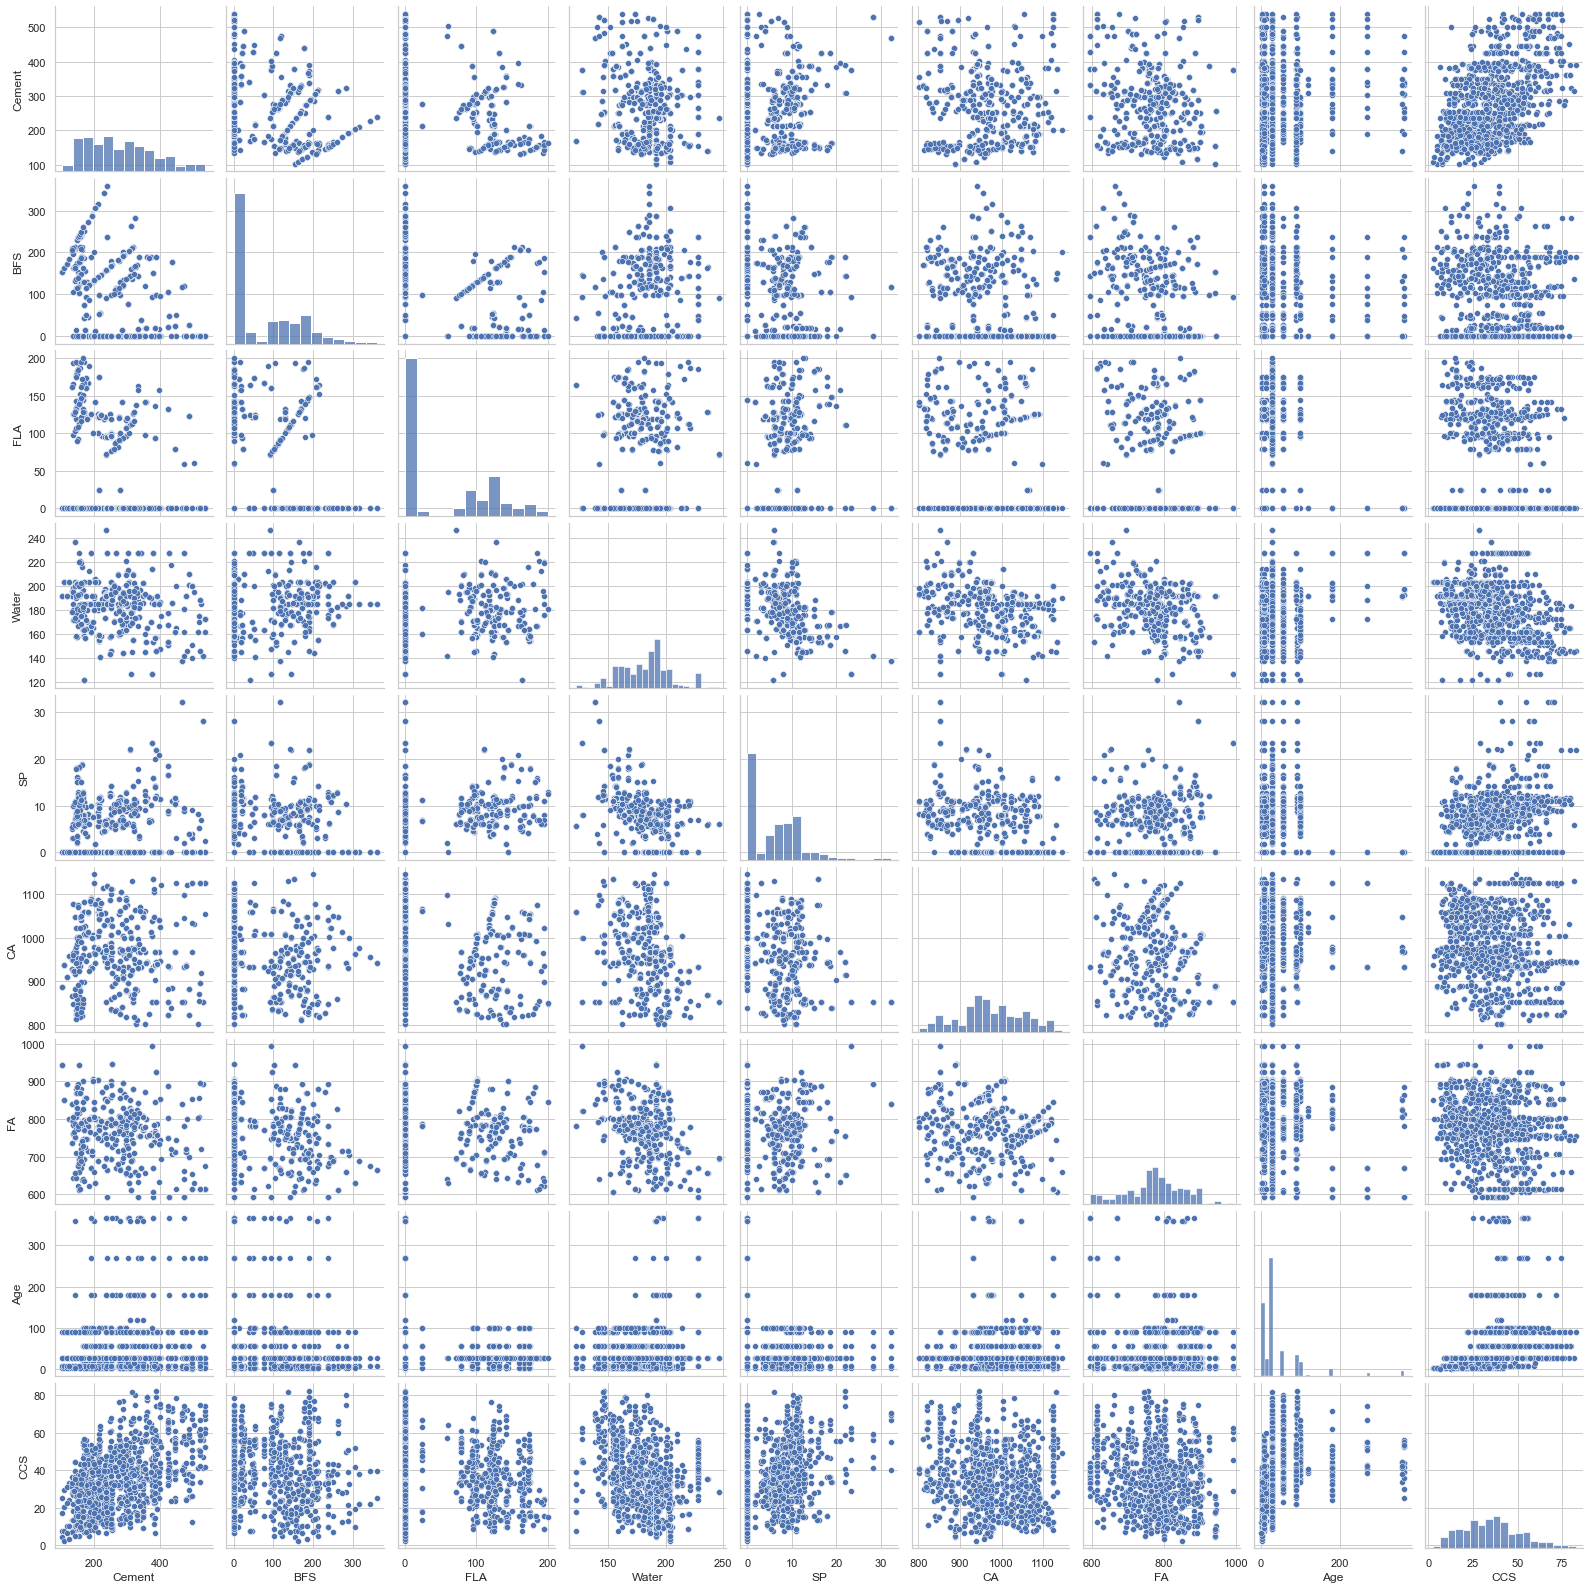

In [24]:
sns.pairplot(data=df)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1029 entries, 0 to 1028
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Cement  1029 non-null   float64
 1   BFS     1029 non-null   float64
 2   FLA     1029 non-null   float64
 3   Water   1029 non-null   float64
 4   SP      1029 non-null   float64
 5   CA      1029 non-null   float64
 6   FA      1029 non-null   float64
 7   Age     1029 non-null   int64  
 8   CCS     1029 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [26]:
df.describe()

,Cement,BFS,FLA,Water,SP,CA,FA,Age,CCS
count,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000
mean,280.914091,73.967298,54.239796,181.585374,6.206710,972.853401,773.673712,45.679300,35.774912
std,104.245542,86.290255,64.005258,21.357226,5.975279,77.763459,80.156602,63.198226,16.656880
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.000000,0.000000,0.000000,164.900000,0.000000,932.000000,732.600000,7.000000,23.696601
50%,272.800000,22.000000,0.000000,185.000000,6.350000,968.000000,779.700000,28.000000,34.397958
75%,350.000000,143.000000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,45.939786
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


# boxplot is a graphical representation used to describe the distribution of a sample by simple dispersion and position indexes

<AxesSubplot:>

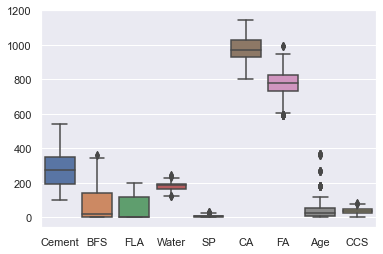

In [27]:

sns.set(style='darkgrid') # colors of the axes.the available styles and darkgrid,white grid ,white and ticks
sns.boxplot(data=df)

In [28]:
df.head(2)

,Cement,BFS,FLA,Water,SP,CA,FA,Age,CCS
0,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
1,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535


In [29]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
print(scaler.fit(df))


MinMaxScaler()


In [30]:
df.head()

,Cement,BFS,FLA,Water,SP,CA,FA,Age,CCS
0,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
1,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
3,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
4,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.029847


In [31]:
datascaled=pd.DataFrame(scaler.fit_transform(df),columns=columns)

In [32]:
datascaled.head()

,Cement,BFS,FLA,Water,SP,CA,FA,Age,CCS
0,1.000000,0.000000,0.0,0.321357,0.07764,0.738372,0.205720,0.074176,0.741964
1,0.526256,0.396494,0.0,0.848303,0.00000,0.380814,0.000000,0.739011,0.472642
2,0.526256,0.396494,0.0,0.848303,0.00000,0.380814,0.000000,1.000000,0.482400
3,0.220548,0.368392,0.0,0.560878,0.00000,0.515698,0.580783,0.986264,0.522806
4,0.374429,0.317195,0.0,0.848303,0.00000,0.380814,0.190667,0.244505,0.556864


<AxesSubplot:>

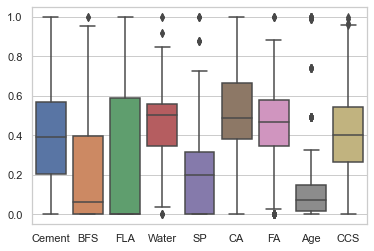

In [33]:
sns.set(style='whitegrid')
sns.boxplot(data=datascaled)

In [34]:
predictors=datascaled.iloc[:,:-1]
response=datascaled.iloc[:,8]

In [35]:
from sklearn.model_selection import train_test_split
pred_train,pred_test,resp_train,resp_test=train_test_split(predictors,response,test_size=0.3,random_state=1)
print(pred_train.shape)
print(pred_test.shape)
print(resp_train.shape)
print(resp_test.shape)


(720, 8)
(309, 8)
(720,)
(309,)


In [37]:
!pip install tensorflow

In [39]:
import tensorflow as tf

In [46]:
!pip install keras

In [48]:
from keras.models import Sequential
from keras.layers import Dense
model=Sequential()
model.add(Dense(20,input_dim=8,activation='relu'))
model.add(Dense(10,input_dim=8,activation='relu'))
model.add(Dense(10,input_dim=8,activation='relu'))
model.add(Dense(1,input_dim=8,activation='linear'))

In [50]:
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['accuracy'])

In [51]:
model.fit(pred_train,resp_train,epochs=500,verbose=1)

Epoch 1/500
23/23 [==============================] - 3s 6ms/step - loss: 0.1311 - accuracy: 0.0014
Epoch 2/500
23/23 [==============================] - 0s 3ms/step - loss: 0.0679 - accuracy: 0.0000e+00
Epoch 3/500
23/23 [==============================] - 0s 3ms/step - loss: 0.0538 - accuracy: 0.0014
Epoch 4/500
23/23 [==============================] - 0s 3ms/step - loss: 0.0450 - accuracy: 0.0014
Epoch 5/500
23/23 [==============================] - 0s 3ms/step - loss: 0.0381 - accuracy: 0.0014
Epoch 6/500
23/23 [==============================] - 0s 2ms/step - loss: 0.0327 - accuracy: 0.0014
Epoch 7/500
23/23 [==============================] - 0s 2ms/step - loss: 0.0279 - accuracy: 0.0014
Epoch 8/500
23/23 [==============================] - 0s 2ms/step - loss: 0.0241 - accuracy: 0.0014
Epoch 9/500
23/23 [==============================] - 0s 2ms/step - loss: 0.0205 - accuracy: 0.0014
Epoch 10/500
23/23 [==============================] - 0s 2ms/step - loss: 0.0183 - accuracy: 0.0014
Epoch

23/23 [==============================] - 0s 2ms/step - loss: 0.0055 - accuracy: 0.0014
Epoch 83/500
23/23 [==============================] - 0s 2ms/step - loss: 0.0055 - accuracy: 0.0014
Epoch 84/500
23/23 [==============================] - 0s 2ms/step - loss: 0.0055 - accuracy: 0.0014
Epoch 85/500
23/23 [==============================] - 0s 2ms/step - loss: 0.0063 - accuracy: 0.0014
Epoch 86/500
23/23 [==============================] - 0s 2ms/step - loss: 0.0055 - accuracy: 0.0014
Epoch 87/500
23/23 [==============================] - 0s 2ms/step - loss: 0.0053 - accuracy: 0.0014
Epoch 88/500
23/23 [==============================] - 0s 2ms/step - loss: 0.0053 - accuracy: 0.0014
Epoch 89/500
23/23 [==============================] - 0s 2ms/step - loss: 0.0054 - accuracy: 0.0014
Epoch 90/500
23/23 [==============================] - 0s 2ms/step - loss: 0.0053 - accuracy: 0.0014
Epoch 91/500
23/23 [==============================] - 0s 2ms/step - loss: 0.0053 - accuracy: 0.0014
Epoch 92/500


23/23 [==============================] - 0s 1ms/step - loss: 0.0042 - accuracy: 0.0014
Epoch 164/500
23/23 [==============================] - 0s 2ms/step - loss: 0.0043 - accuracy: 0.0014
Epoch 165/500
23/23 [==============================] - 0s 1ms/step - loss: 0.0044 - accuracy: 0.0014
Epoch 166/500
23/23 [==============================] - 0s 2ms/step - loss: 0.0043 - accuracy: 0.0014
Epoch 167/500
23/23 [==============================] - 0s 2ms/step - loss: 0.0042 - accuracy: 0.0014
Epoch 168/500
23/23 [==============================] - 0s 2ms/step - loss: 0.0043 - accuracy: 0.0014
Epoch 169/500
23/23 [==============================] - 0s 2ms/step - loss: 0.0043 - accuracy: 0.0014
Epoch 170/500
23/23 [==============================] - 0s 2ms/step - loss: 0.0047 - accuracy: 0.0014
Epoch 171/500
23/23 [==============================] - 0s 2ms/step - loss: 0.0043 - accuracy: 0.0014
Epoch 172/500
23/23 [==============================] - 0s 2ms/step - loss: 0.0043 - accuracy: 0.0014
Epoc

23/23 [==============================] - 0s 2ms/step - loss: 0.0036 - accuracy: 0.0014
Epoch 244/500
23/23 [==============================] - 0s 2ms/step - loss: 0.0036 - accuracy: 0.0014
Epoch 245/500
23/23 [==============================] - 0s 2ms/step - loss: 0.0036 - accuracy: 0.0014
Epoch 246/500
23/23 [==============================] - 0s 2ms/step - loss: 0.0036 - accuracy: 0.0014
Epoch 247/500
23/23 [==============================] - 0s 2ms/step - loss: 0.0037 - accuracy: 0.0014
Epoch 248/500
23/23 [==============================] - 0s 2ms/step - loss: 0.0040 - accuracy: 0.0014
Epoch 249/500
23/23 [==============================] - 0s 2ms/step - loss: 0.0039 - accuracy: 0.0014
Epoch 250/500
23/23 [==============================] - 0s 2ms/step - loss: 0.0037 - accuracy: 0.0014
Epoch 251/500
23/23 [==============================] - 0s 2ms/step - loss: 0.0036 - accuracy: 0.0014
Epoch 252/500
23/23 [==============================] - 0s 2ms/step - loss: 0.0035 - accuracy: 0.0014
Epoc

23/23 [==============================] - 0s 2ms/step - loss: 0.0033 - accuracy: 0.0014
Epoch 325/500
23/23 [==============================] - 0s 2ms/step - loss: 0.0032 - accuracy: 0.0014
Epoch 326/500
23/23 [==============================] - 0s 2ms/step - loss: 0.0032 - accuracy: 0.0014
Epoch 327/500
23/23 [==============================] - 0s 2ms/step - loss: 0.0034 - accuracy: 0.0014
Epoch 328/500
23/23 [==============================] - 0s 2ms/step - loss: 0.0036 - accuracy: 0.0014
Epoch 329/500
23/23 [==============================] - 0s 2ms/step - loss: 0.0033 - accuracy: 0.0014
Epoch 330/500
23/23 [==============================] - 0s 2ms/step - loss: 0.0032 - accuracy: 0.0014
Epoch 331/500
23/23 [==============================] - 0s 2ms/step - loss: 0.0032 - accuracy: 0.0014
Epoch 332/500
23/23 [==============================] - 0s 2ms/step - loss: 0.0031 - accuracy: 0.0014
Epoch 333/500
23/23 [==============================] - 0s 2ms/step - loss: 0.0034 - accuracy: 0.0014
Epoc

23/23 [==============================] - 0s 2ms/step - loss: 0.0029 - accuracy: 0.0014
Epoch 406/500
23/23 [==============================] - 0s 2ms/step - loss: 0.0030 - accuracy: 0.0014
Epoch 407/500
23/23 [==============================] - 0s 2ms/step - loss: 0.0028 - accuracy: 0.0014
Epoch 408/500
23/23 [==============================] - 0s 2ms/step - loss: 0.0029 - accuracy: 0.0014
Epoch 409/500
23/23 [==============================] - 0s 1ms/step - loss: 0.0031 - accuracy: 0.0014
Epoch 410/500
23/23 [==============================] - 0s 2ms/step - loss: 0.0029 - accuracy: 0.0014
Epoch 411/500
23/23 [==============================] - 0s 2ms/step - loss: 0.0029 - accuracy: 0.0014
Epoch 412/500
23/23 [==============================] - 0s 2ms/step - loss: 0.0030 - accuracy: 0.0014
Epoch 413/500
23/23 [==============================] - 0s 2ms/step - loss: 0.0029 - accuracy: 0.0014
Epoch 414/500
23/23 [==============================] - 0s 1ms/step - loss: 0.0030 - accuracy: 0.0014
Epoc

23/23 [==============================] - 0s 2ms/step - loss: 0.0027 - accuracy: 0.0014
Epoch 486/500
23/23 [==============================] - 0s 2ms/step - loss: 0.0028 - accuracy: 0.0014
Epoch 487/500
23/23 [==============================] - 0s 2ms/step - loss: 0.0028 - accuracy: 0.0014
Epoch 488/500
23/23 [==============================] - 0s 2ms/step - loss: 0.0027 - accuracy: 0.0014
Epoch 489/500
23/23 [==============================] - 0s 2ms/step - loss: 0.0027 - accuracy: 0.0014
Epoch 490/500
23/23 [==============================] - 0s 2ms/step - loss: 0.0027 - accuracy: 0.0014
Epoch 491/500
23/23 [==============================] - 0s 2ms/step - loss: 0.0029 - accuracy: 0.0014
Epoch 492/500
23/23 [==============================] - 0s 1ms/step - loss: 0.0027 - accuracy: 0.0014
Epoch 493/500
23/23 [==============================] - 0s 2ms/step - loss: 0.0029 - accuracy: 0.0014
Epoch 494/500
23/23 [==============================] - 0s 2ms/step - loss: 0.0027 - accuracy: 0.0014
Epoc

In [53]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                180       
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 511
Trainable params: 511
Non-trainable params: 0
_________________________________________________________________


In [54]:
from sklearn.metrics import r2_score

In [56]:
y_predict=model.predict(pred_test)

In [57]:
r2_score(y_predict,resp_test)

0.858267506213801